In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Data Handling
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [3]:
# Load the dataset
df = pd.read_csv(r"C:\Users\divya\OneDrive\Documents\Desktop\Customer Churn Analysis\Dataset\WA_Fn-UseC_-Telco-Customer-Churn.csv")  

# Display the first few rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Checking dataset info
df.info()

# Checking for missing values
df.isnull().sum()

# Summary statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Step 3: Data Preprocessing
1️⃣ Convert 'TotalCharges' to Numeric

In [5]:
# Converting the 'TotalCharges' to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Filling missing values with 0
df["TotalCharges"].fillna(0, inplace=True)

2. Drop Irrelevant Columns

In [6]:
# Drop 'customerID' since it's not useful for analysis
df.drop(columns=["customerID"], inplace=True)

3. Encode Categorical Features

In [7]:
# Converting categorical variables into numerical
for column in df.select_dtypes(include=["object"]).columns:
    if column != "Churn":  # Exclude target variable
        df[column] = LabelEncoder().fit_transform(df[column])

# Encoding the target variable (Churn: Yes = 1, No = 0)
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})


checking if the Categoral variables have changed to numeric

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


4.Scale Numeric Features

In [9]:
# Scaling the numeric features to standardize values
scaler = StandardScaler()
df[["tenure", "MonthlyCharges", "TotalCharges"]] = scaler.fit_transform(df[["tenure", "MonthlyCharges", "TotalCharges"]])


## Step 4: Exploratory Data Analysis (EDA)

1. Churn Distribution

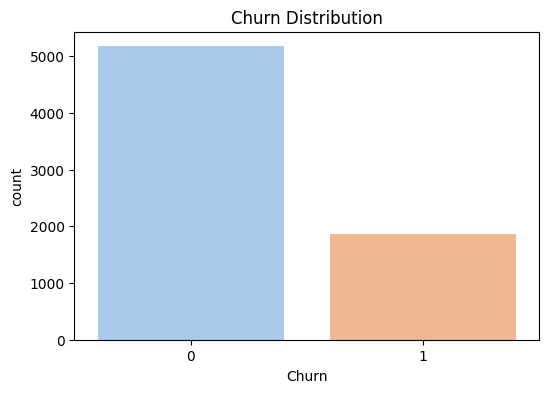

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x="Churn", data=df, palette="pastel")
plt.title("Churn Distribution")
plt.show()


2. Correlation Heatmap

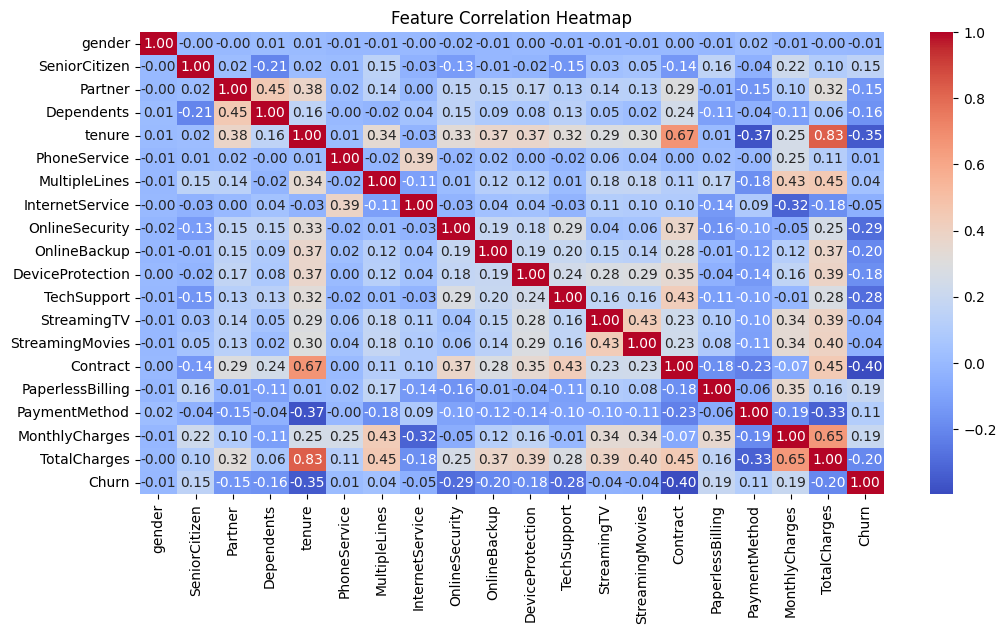

In [11]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

3. Monthly Charges vs. Churn

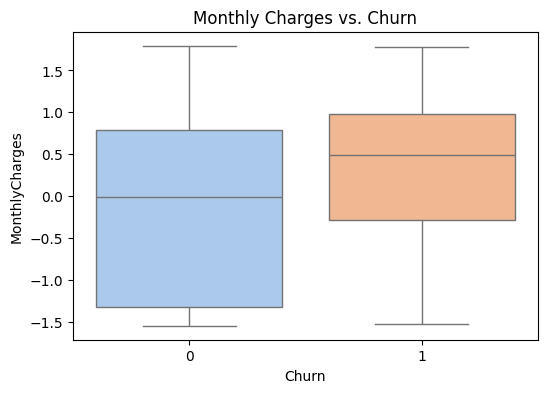

In [12]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Churn", y="MonthlyCharges", data=df, palette="pastel")
plt.title("Monthly Charges vs. Churn")
plt.show()

4. Tenure vs. Churn

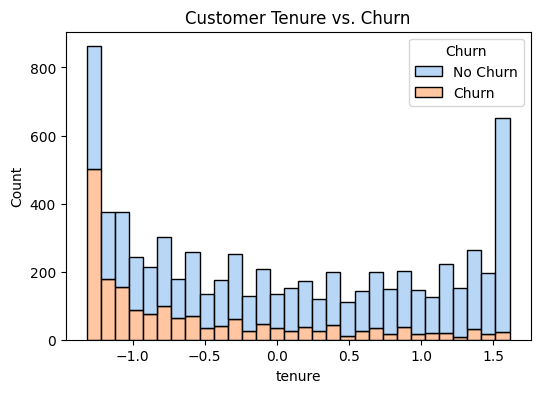

In [14]:
plt.figure(figsize=(6,4))
df["Churn"] = df["Churn"].replace({0: "No Churn", 1: "Churn"})
sns.histplot(data=df, x="tenure", hue="Churn", multiple="stack", palette="pastel", bins=30)
plt.title("Customer Tenure vs. Churn")
plt.show()

5. Tenure vs. Churn

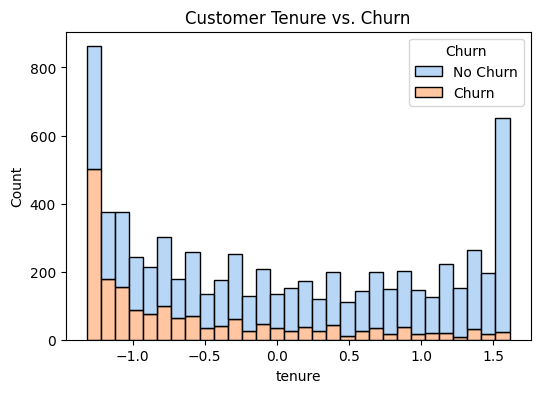

In [15]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x="tenure", hue="Churn", multiple="stack", palette="pastel", bins=30)
plt.title("Customer Tenure vs. Churn")
plt.show()

## Step 5: Train-Test Split

In [16]:
# Defining features (X) and target variable (y)
X = df.drop(columns=["Churn"])
y = df["Churn"]

# Splitting into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


## Step 6: Train Machine Learning Models

1. Logistic Regression

In [17]:
# Training Logistic Regression Model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred_lr = lr.predict(X_test)

# Evaluating Model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.7970191625266146
              precision    recall  f1-score   support

       Churn       0.64      0.53      0.58       374
    No Churn       0.84      0.89      0.87      1035

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



2. Random Forest Classifier

In [18]:
# Training Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluating Model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.7863733144073811
              precision    recall  f1-score   support

       Churn       0.63      0.47      0.54       374
    No Churn       0.83      0.90      0.86      1035

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.77      0.79      0.78      1409



Step 7: Model Evaluation
1. Compare Model Accuracy

In [19]:
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_lr) * 100:.2f}%")
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf) * 100:.2f}%")

Logistic Regression Accuracy: 79.70%
Random Forest Accuracy: 78.64%


2. Confusion Matrix for Random Forest


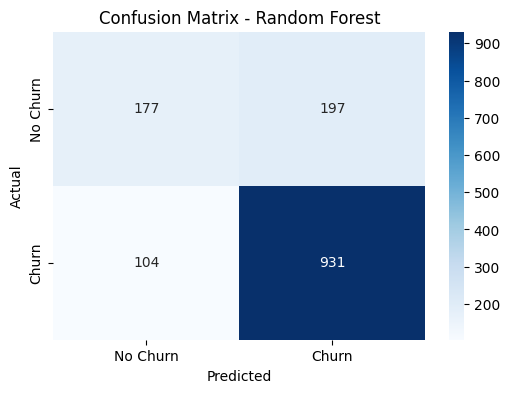

In [20]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


- Key Insights from the Project
1. The dataset is slightly imbalanced, with more customers not churning.
2. Customers with higher Monthly Charges tend to churn more.
3. Tenure plays a role new customers are more likely to churn.
4. Random Forest outperforms Logistic Regression, achieving better accuracy.
5. Business can offer discounts, better plans, or improved service to reduce churn.
